In [2]:
import pandas as pd
from pathlib import Path
import statistics
import matplotlib.pyplot as plt
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import timedelta
import plotly.express as px

In [3]:
fname = Path(r"C:\Users\euzoe\OneDrive\Desktop\DATA ANALYSIS\MY_PROJECTS\Train.csv")
fname.is_file()

True

In [7]:
df = pd.read_csv(fname)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
df.shape

(8523, 12)

In [9]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
#DATA CLEANING

In [11]:
d=df[['Item_Weight', 'Outlet_Size']] #columns with missing values

In [12]:
d.isnull().sum() #columns with missing values

Item_Weight    1463
Outlet_Size    2410
dtype: int64

In [13]:
#deal with the missing value

#replace the missing value with the mean of the column

df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace=True)

In [14]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
#drop the whole row using dropna. used basically for column with missing strings
#or 
#replace with the mode value

#df.dropna(subset=['Outlet_Size'], axis=0, inplace=True)

df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0],inplace=True)
df["Outlet_Size"].isnull().sum()

0

In [16]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [18]:
df.shape

(8523, 12)

In [19]:
#Question 1

#Does the outlet type (grocery store or supermarket) have any impact on the overall sales?

df['Outlet_Type'].head()

0    Supermarket Type1
1    Supermarket Type2
2    Supermarket Type1
3        Grocery Store
4    Supermarket Type1
Name: Outlet_Type, dtype: object

In [20]:
df['Item_Outlet_Sales'].head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [21]:
#median outlet sales
df['Item_Outlet_Sales'].median()

1794.331

In [22]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [23]:
df['Item_Outlet_Sales'].count()

8523

In [190]:
df.shape

(8523, 12)

In [191]:
#most patronized stores

df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [194]:
#to get the percentage of most patronized stores

df['Outlet_Type'].value_counts(normalize=True)

Supermarket Type1   0.6543
Grocery Store       0.1271
Supermarket Type3   0.1097
Supermarket Type2   0.1089
Name: Outlet_Type, dtype: float64

In [195]:
#GROUPBY involves 3 steps
    #split
    #apply function
    #combine results
    
#first, split the column you want to work with
    #using-

#variable name= df.groupby(['column name'])

    #to get a particular data from the column, use the 'get_group' function. 
    #using-

#variable name.get_group('the data name that you want to look at from the column')

#Second is to bring together all the splitted datas together using a function.
    #



SyntaxError: invalid syntax (Temp/ipykernel_13812/2967105324.py, line 9)

In [196]:
pd.set_option('display.float_format', lambda x: '%.4f' %x)

In [197]:
sales_type=df.groupby(['Outlet_Type']) [['Item_Outlet_Sales']].sum().sort_values(by=['Item_Outlet_Sales'], ascending=[False]).reset_index()
sales_type

,Outlet_Type,Item_Outlet_Sales
0,Supermarket Type1,12917342.2630
1,Supermarket Type3,3453926.0514
2,Supermarket Type2,1851822.8300
3,Grocery Store,368034.2660


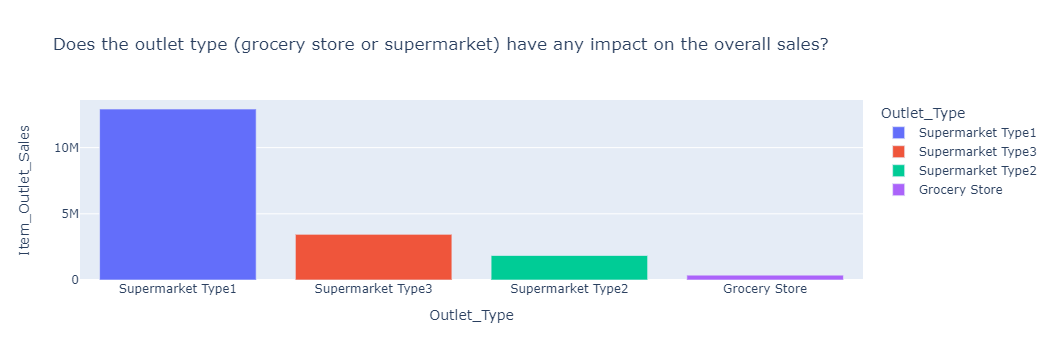

In [198]:
fig = px.bar(sales_type, y='Item_Outlet_Sales', x='Outlet_Type', color='Outlet_Type', title='Does the outlet type (grocery store or supermarket) have any impact on the overall sales?') #to plot a bargraph
fig.show()

In [199]:
#Question 2
#Which type of city has the most overall sales? Or which outlet location makes the most overall sales?

df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3000,Low Fat,0.0160,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.9200,Regular,0.0193,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5000,Low Fat,0.0168,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2000,Regular,0.0000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.9300,Low Fat,0.0000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [200]:
sales_location=df.groupby(['Outlet_Location_Type']) [['Item_Outlet_Sales']].sum().sort_values(by=['Item_Outlet_Sales'], ascending=[False]).reset_index()
sales_location

,Outlet_Location_Type,Item_Outlet_Sales
0,Tier 3,7636752.6320
1,Tier 2,6472313.7064
2,Tier 1,4482059.0720


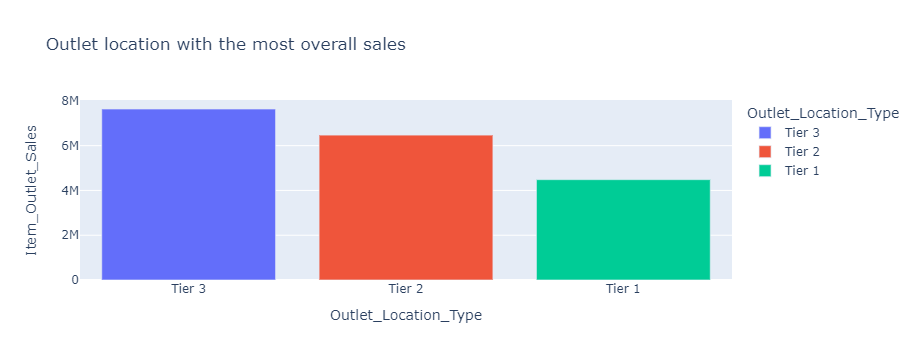

In [201]:
fig = px.bar(sales_location, y='Item_Outlet_Sales', x='Outlet_Location_Type', color='Outlet_Location_Type', title='Outlet location with the most overall sales') #to plot a bargraph
fig.show()

In [202]:
#Question 3
#which location had the maximum sales 

sales_max=df.groupby(['Outlet_Location_Type']) [['Item_Outlet_Sales']].max().sort_values(by=['Item_Outlet_Sales'], ascending=[False]).reset_index()
sales_max

,Outlet_Location_Type,Item_Outlet_Sales
0,Tier 3,13086.9648
1,Tier 1,9779.9362
2,Tier 2,9664.7528


In [203]:
for i in df['Item_Outlet_Sales']:
    if i==13086.9648:
        print(i)

13086.9648


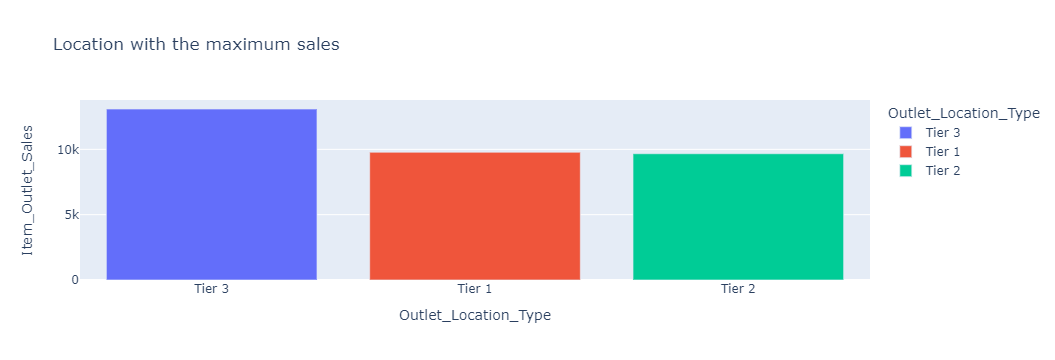

In [ ]:
fig = px.bar(sales_max, y='Item_Outlet_Sales', x='Outlet_Location_Type', color='Outlet_Location_Type', title='Location with the maximum sales') #to plot a bargraph
fig.show()

In [ ]:
#Question 4
#Does the outlet size have any impact on the overall sales

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3000,Low Fat,0.0160,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.9200,Regular,0.0193,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5000,Low Fat,0.0168,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2000,Regular,0.0000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.9300,Low Fat,0.0000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [209]:
outlet_size=df.groupby(['Outlet_Size']) [['Item_Outlet_Sales']].sum().sort_values(by=['Item_Outlet_Sales'], ascending=[False]).reset_index()
outlet_size

,Outlet_Size,Item_Outlet_Sales
0,Medium,11882249.6350
1,Small,4566212.1972
2,High,2142663.5782


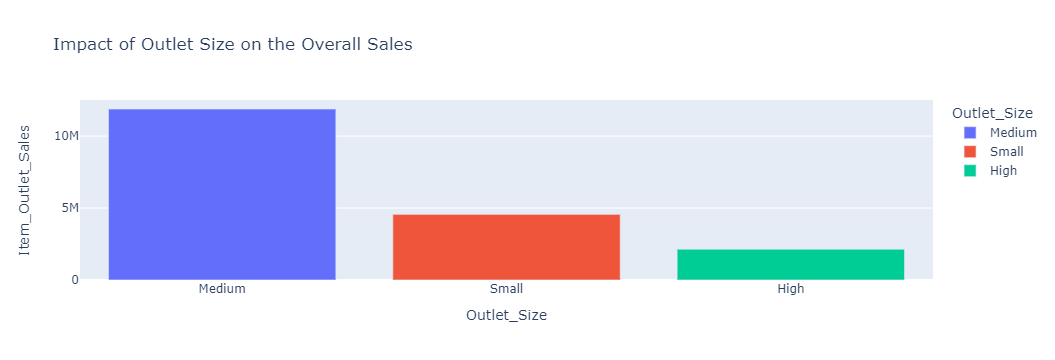

In [211]:
fig = px.bar(outlet_size, y='Item_Outlet_Sales', x='Outlet_Size', color='Outlet_Size', title='Impact of Outlet Size on the Overall Sales')
fig.show()

In [218]:
#Question 5
#a. Which category of products sells the most?

df.head(15)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3000,Low Fat,0.0160,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.9200,Regular,0.0193,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5000,Low Fat,0.0168,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2000,Regular,0.0000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.9300,Low Fat,0.0000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.3950,Regular,0.0000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.6500,Regular,0.0127,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.8576,Low Fat,0.1275,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.2000,Regular,0.0167,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.2000,Regular,0.0944,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [220]:
pro_type=df.groupby(['Item_Type']) [['Item_Outlet_Sales']].max().sort_values(by=['Item_Outlet_Sales'], ascending=[False]).reset_index()
pro_type

,Item_Type,Item_Outlet_Sales
0,Household,13086.9648
1,Fruits and Vegetables,12117.5600
2,Snack Foods,10993.6896
3,Canned,10306.5840
4,Dairy,10256.6490
5,Health and Hygiene,9779.9362
6,Frozen Foods,9678.0688
7,Soft Drinks,9554.2300
8,Meat,9390.4432
9,Breads,8958.3390


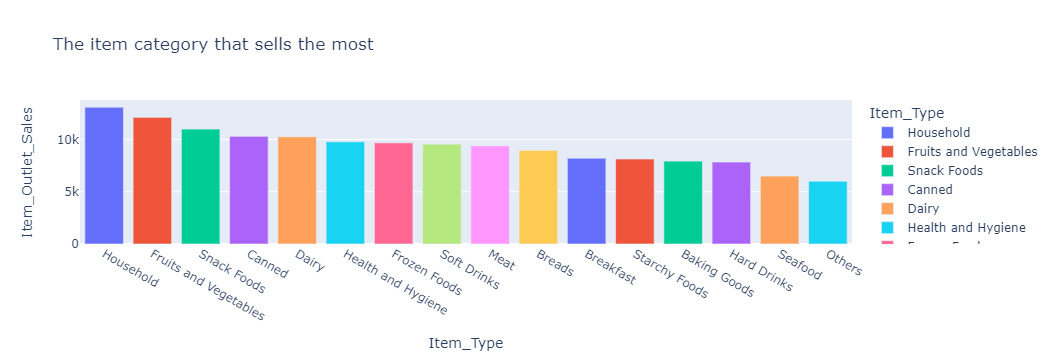

In [221]:
fig=px.bar(pro_type, y='Item_Outlet_Sales', x='Item_Type', color='Item_Type', title='The item category that sells the most')
fig.show()

In [224]:
#b. Which category of products sells the least?

pro_type_least=df.groupby(['Item_Type']) [['Item_Outlet_Sales']].min().sort_values(by=['Item_Outlet_Sales'], ascending=[False]).reset_index()
pro_type_least

#unansered

,Item_Type,Item_Outlet_Sales
0,Seafood,149.8050
1,Starchy Foods,58.5904
2,Meat,47.9376
3,Fruits and Vegetables,45.2744
4,Dairy,40.6138
5,Breakfast,39.9480
6,Others,39.9480
7,Canned,37.9506
8,Hard Drinks,37.9506
9,Baking Goods,37.2848


In [225]:
#Question 6
#Do the product visibility and weight have any impact on the sales of the product?

#not fully answered
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3000,Low Fat,0.0160,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.9200,Regular,0.0193,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5000,Low Fat,0.0168,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2000,Regular,0.0000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.9300,Low Fat,0.0000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [255]:
vis_we_sales=df.groupby(['Item_Visibility', 'Item_Weight']) [['Item_Outlet_Sales']].max().sort_values(by=['Item_Outlet_Sales'], ascending=[False]).reset_index()
vis_we_sales

,Item_Visibility,Item_Weight,Item_Outlet_Sales
0,0.0106,12.8576,13086.9648
1,0.0143,12.8576,12117.5600
2,0.0000,12.8576,11445.1020
3,0.0888,12.8576,10993.6896
4,0.0307,12.8576,10306.5840
...,...,...,...
8190,0.0245,12.8576,36.6190
8191,0.2815,7.1550,35.2874
8192,0.0731,12.8576,34.6216
8193,0.1343,12.8576,33.9558


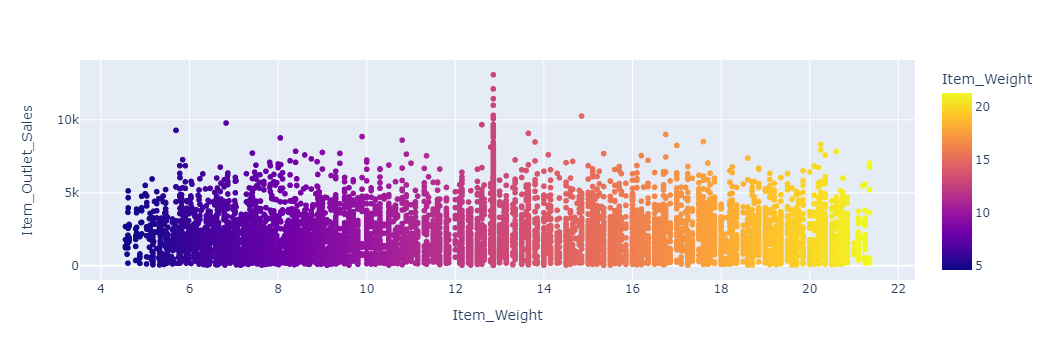

In [266]:
fig=px.scatter(vis_we_sales, y='Item_Outlet_Sales', x='Item_Weight', color='Item_Weight')
fig.show()

In [258]:
vis_we_sales.corr()

,Item_Visibility,Item_Weight,Item_Outlet_Sales
Item_Visibility,1.0000,-0.0047,-0.1455
Item_Weight,-0.0047,1.0000,0.0126
Item_Outlet_Sales,-0.1455,0.0126,1.0000


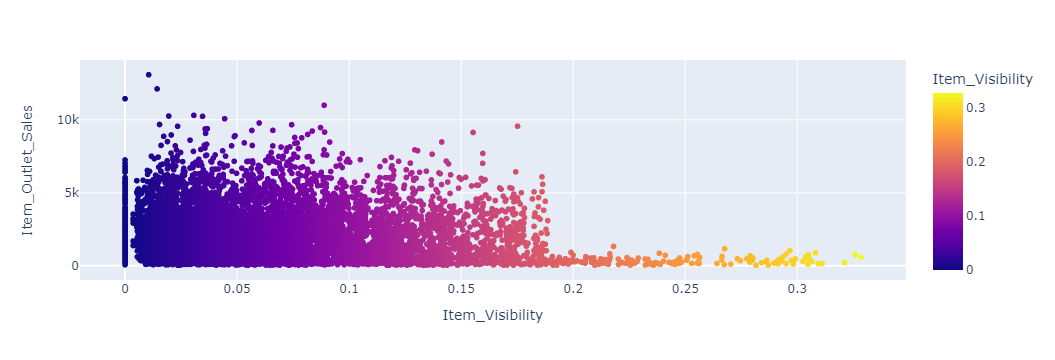

In [261]:
fig=px.scatter(vis_we_sales, y='Item_Outlet_Sales', x='Item_Visibility', color='Item_Visibility')
fig.show()

In [267]:
#Question 6
#What is the average MRP of the product that sells the most and the least? Which category do these products fall under?

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3000,Low Fat,0.0160,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.9200,Regular,0.0193,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5000,Low Fat,0.0168,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2000,Regular,0.0000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.9300,Low Fat,0.0000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [273]:
ave=df.groupby(['Item_MRP']).mean().sort_values(by=['Item_Outlet_Sales'], ascending=[False]).reset_index()
ave

,Item_MRP,Item_Weight,Item_Visibility,Outlet_Establishment_Year,Item_Outlet_Sales
0,254.2672,12.8576,0.0888,1985.0000,10993.6896
1,245.2802,12.8576,0.0444,1985.0000,10072.8882
2,262.5226,6.8250,0.0598,1997.0000,9779.9362
3,255.5356,12.6000,0.0743,2007.0000,9664.7528
4,190.6846,12.8576,0.0235,1985.0000,9554.2300
...,...,...,...,...,...
5933,35.2190,15.3500,0.0235,1998.0000,36.6190
5934,33.8874,7.1550,0.2815,1998.0000,35.2874
5935,34.3216,12.8576,0.0731,1985.0000,34.6216
5936,35.0558,12.8576,0.1343,1985.0000,33.9558


In [277]:
ave=df.groupby('Item_MRP').max().sort_values(by=['Item_Outlet_Sales'], ascending=[False]).reset_index()
ave

,Item_MRP,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,234.9958,NCE42,20.3500,Regular,0.0148,Household,OUT027,1987,Medium,Tier 3,Supermarket Type3,13086.9648
1,242.6512,FDQ19,12.8576,Regular,0.0144,Fruits and Vegetables,OUT027,1987,Medium,Tier 3,Supermarket Type3,12117.5600
2,253.0356,FDZ20,17.5000,Regular,0.1237,Snack Foods,OUT035,2004,Small,Tier 3,Supermarket Type3,11445.1020
3,254.2672,FDP33,12.8576,Low Fat,0.0888,Snack Foods,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
4,228.0352,FDR34,17.0000,Regular,0.1536,Snack Foods,OUT027,2009,Medium,Tier 3,Supermarket Type3,10306.5840
...,...,...,...,...,...,...,...,...,...,...,...,...
5933,35.2190,FDS40,15.3500,Low Fat,0.0235,Frozen Foods,OUT010,1998,Medium,Tier 3,Grocery Store,36.6190
5934,33.8874,FDQ47,7.1550,Regular,0.2815,Breads,OUT010,1998,Medium,Tier 3,Grocery Store,35.2874
5935,34.3216,NCL41,12.8576,Low Fat,0.0731,Health and Hygiene,OUT019,1985,Small,Tier 1,Grocery Store,34.6216
5936,35.0558,FDU21,12.8576,Regular,0.1343,Snack Foods,OUT019,1985,Small,Tier 1,Grocery Store,33.9558


In [279]:
df.loc[df['Item_MRP']==234.9958]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7060,FDX31,20.3500,Regular,0.0148,Fruits and Vegetables,234.9958,OUT013,1987,High,Tier 3,Supermarket Type1,5842.3950
7188,NCE42,12.8576,Low Fat,0.0106,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648


In [301]:
#Question 7
#What are some products that sell better in Tier 1 cities as compared to Tier 2 and Tier 3 cities?

vis=df.groupby(['Item_Type', 'Outlet_Location_Type']) [['Item_Outlet_Sales']].max().sort_values(by=['Item_Outlet_Sales'], ascending=[False]).reset_index()
vis


In [303]:
tier1=vis.loc[vis['Outlet_Location_Type']=='Tier 1']
tier1

,Item_Type,Outlet_Location_Type,Item_Outlet_Sales
5,Health and Hygiene,Tier 1,9779.9362
15,Starchy Foods,Tier 1,8132.0812
18,Dairy,Tier 1,7833.8028
21,Canned,Tier 1,7590.1200
22,Fruits and Vegetables,Tier 1,7549.5062
24,Frozen Foods,Tier 1,7370.4060
27,Household,Tier 1,7148.0288
32,Soft Drinks,Tier 1,7017.5320
33,Breads,Tier 1,6972.2576
34,Breakfast,Tier 1,6930.9780


In [304]:
tier2=vis.loc[vis['Outlet_Location_Type']=='Tier 2']
tier2

,Item_Type,Outlet_Location_Type,Item_Outlet_Sales
7,Dairy,Tier 2,9664.7528
10,Frozen Foods,Tier 2,9275.9256
11,Fruits and Vegetables,Tier 2,8994.9580
13,Snack Foods,Tier 2,8604.7992
16,Baking Goods,Tier 2,7931.6754
20,Soft Drinks,Tier 2,7696.6480
25,Canned,Tier 2,7247.2330
26,Household,Tier 2,7240.5750
29,Hard Drinks,Tier 2,7084.1120
30,Breads,Tier 2,7064.8038


In [305]:
tier3=vis.loc[vis['Outlet_Location_Type']=='Tier 3']
tier3

,Item_Type,Outlet_Location_Type,Item_Outlet_Sales
0,Household,Tier 3,13086.9648
1,Fruits and Vegetables,Tier 3,12117.5600
2,Snack Foods,Tier 3,10993.6896
3,Canned,Tier 3,10306.5840
4,Dairy,Tier 3,10256.6490
6,Frozen Foods,Tier 3,9678.0688
8,Soft Drinks,Tier 3,9554.2300
9,Meat,Tier 3,9390.4432
12,Breads,Tier 3,8958.3390
14,Breakfast,Tier 3,8209.3140


In [26]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800
